In [6]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import recall_score, confusion_matrix

categories = ['NORMAL', 'PNEUMONIA']
images = []
labels = []

target_size = (150, 150)


In [7]:
# Charger les données
def preprocess_image(img):
    img = img.convert('L')
    img = img.resize(target_size)
    img_array = np.array(img)
    return img_array

def load_data(data_dir):
    for label, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpeg'):
                img_path = os.path.join(category_dir, filename)
                with Image.open(img_path) as img:
                    img_array = preprocess_image(img)
                    images.append(img_array)
                    labels.append(label)

print("Loading data...")
load_data('../data')
print("Data loaded")

Loading data...
Data loaded


In [8]:
images_np_flatten = np.array(images).reshape(len(images), -1)

x_train, x_test, y_train, y_test = train_test_split(images_np_flatten, labels, test_size=0.2, random_state=42)

print("Training model...")
model = SVC()
model.fit(x_train, y_train)
print("Model trained")

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("Train recall:", recall_score(y_train, y_pred_train))
print("Test recall:", recall_score(y_test, y_pred_test))

Training model...
Model trained
Train recall: 0.9854735618826264
Test recall: 0.9699157641395909


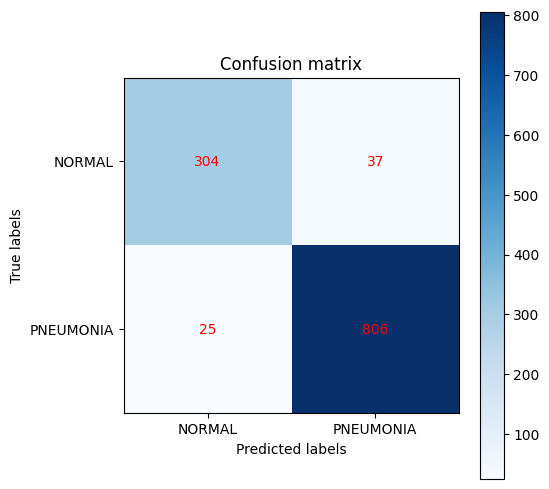

In [9]:
# Plotting
plt.figure(figsize=(10, 5))

# Plot de la matrice de confusion with numbers
plt.subplot(1, 2, 1)
plt.imshow(confusion_matrix(y_test, y_pred_test), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(2), categories)
plt.yticks(np.arange(2), categories)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix(y_test, y_pred_test)[i, j], ha='center', va='center', color='red')
plt.tight_layout()
plt.show()

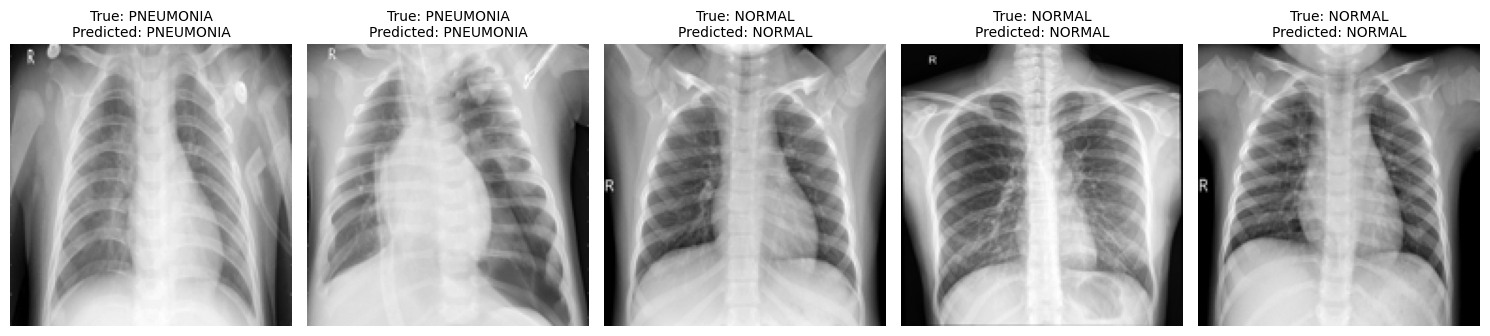

In [10]:
# Plot des images avec les prédictions et les vraies étiquettes
plt.figure(figsize=(15, 5))  # Ajustement de la taille de la figure

n_images = 5
for i in range(n_images):
    plt.subplot(1, n_images, i + 1)
    plt.imshow(x_test[i].reshape(target_size), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {categories[y_test[i]]}\nPredicted: {categories[y_pred_test[i]]}", fontsize=10, pad=5)  # Légende avec étiquettes vraies et prédites

plt.tight_layout()  # Ajustement automatique des sous-graphiques pour un meilleur espacement
plt.show()

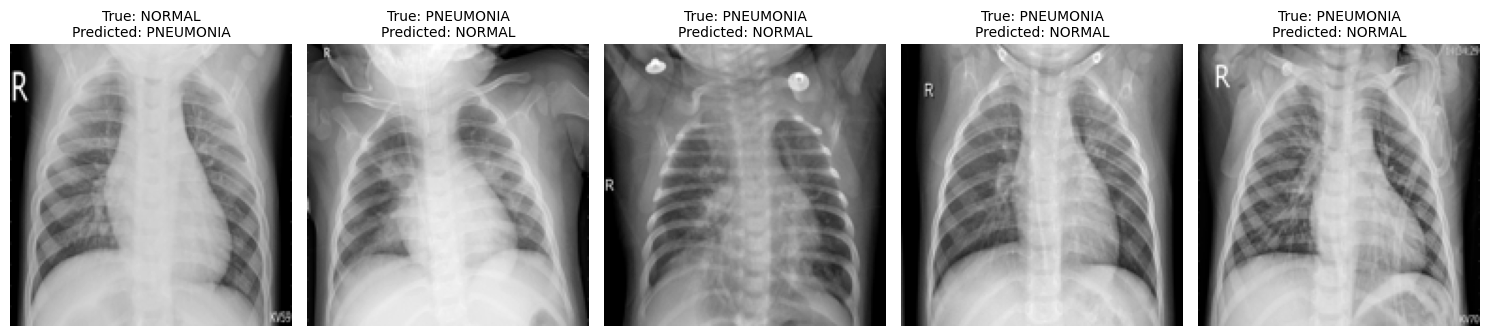

In [11]:
# plot misclassification
misclassified = np.where(y_test != y_pred_test)[0]
n_images = 5
plt.figure(figsize=(15, 5))
for i in range(n_images):
    plt.subplot(1, n_images, i + 1)
    plt.imshow(x_test[misclassified[i]].reshape(target_size), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {categories[y_test[misclassified[i]]]}\nPredicted: {categories[y_pred_test[misclassified[i]]]}", fontsize=10, pad=5)
plt.tight_layout()
plt.show()

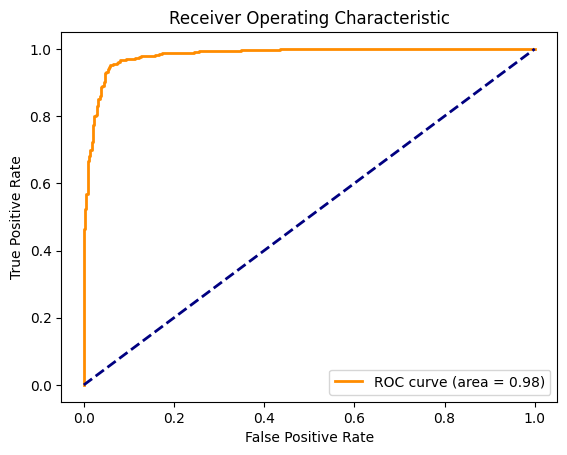

In [12]:
# plot roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import auc

y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_test_bin = model.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_test_bin)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
